In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
!pip install torchviz

from torchviz import make_dot

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

In [ ]:
# device config
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [ ]:
# hyper parameters
input_size = 784 #128*128
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 64
lr = 0.001

In [ ]:
# Mnist
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                          transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                          transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 6000813.36it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 161827.99it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1296987.01it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4819258.48it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size,
                          shuffle=False)

In [ ]:
# create an iterator from the dataloader
examples = iter(train_loader)
#fetch the next batch of samples and labels using next
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


we can see that for the samples we have 64 batches, 1 channel, 28 height size 28 wwight size. And for the label we have 64 labels

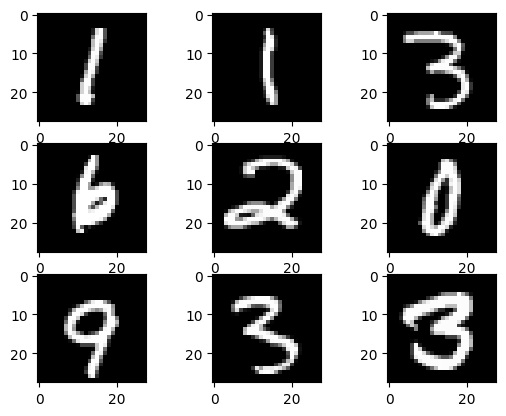

In [ ]:
for i in range(9):
  # 2rows, 3columns
  plt.subplot(3,3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()


In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out
model = NeuralNet(input_size, hidden_size, num_classes)
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


epoch 1 / 5, step 100/938, loss = 0.0008
epoch 1 / 5, step 200/938, loss = 0.0005
epoch 1 / 5, step 300/938, loss = 0.0010
epoch 1 / 5, step 400/938, loss = 0.0000
epoch 1 / 5, step 500/938, loss = 0.0013
epoch 1 / 5, step 600/938, loss = 0.0029
epoch 1 / 5, step 700/938, loss = 0.0014
epoch 1 / 5, step 800/938, loss = 0.0115
epoch 1 / 5, step 900/938, loss = 0.0215
epoch 2 / 5, step 100/938, loss = 0.0021
epoch 2 / 5, step 200/938, loss = 0.0006
epoch 2 / 5, step 300/938, loss = 0.0009
epoch 2 / 5, step 400/938, loss = 0.0013
epoch 2 / 5, step 500/938, loss = 0.0004
epoch 2 / 5, step 600/938, loss = 0.0083
epoch 2 / 5, step 700/938, loss = 0.0002
epoch 2 / 5, step 800/938, loss = 0.0006
epoch 2 / 5, step 900/938, loss = 0.0026
epoch 3 / 5, step 100/938, loss = 0.0003
epoch 3 / 5, step 200/938, loss = 0.0150
epoch 3 / 5, step 300/938, loss = 0.0011
epoch 3 / 5, step 400/938, loss = 0.0004
epoch 3 / 5, step 500/938, loss = 0.0015
epoch 3 / 5, step 600/938, loss = 0.0001
epoch 3 / 5, ste

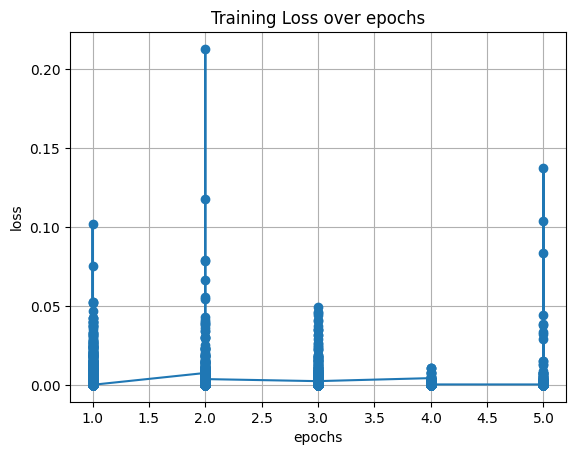

In [ ]:
# training loop
training_losses = []
epochs = []
model.train()
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    #100, 1, 28, 28
    # 100, 784
    images = images.reshape(-1, 28*28)
    labels = labels
    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backwards
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # append the current loss to list
    training_losses.append(loss.item())
    epochs.append(epoch + 1)

    if(i+1) % 100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
# plotting the training loss
plt.plot(epochs, training_losses, marker='o')
plt.title('Training Loss over epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)
plt.show()


In [ ]:
# testing
model.eval()
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28)
    labels = labels
    ouputs = model(images)

    # value, index
    _, predictions = torch.max(ouputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuarcy = {acc} ')




accuarcy = 97.22 
